
# Project: Investigate a Dataset (No_Show appointment )

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
 I have investigated a dataset of appoinment records for Brasil public hospitals. The data includes some attributes of patients and state if the patients showed up to appointments. The analysis is focused on finding trends influencing patients to show or not show up to appointments.
 this data set we are gitting it and can be found here: https://www.kaggle.com/joniarroba/noshowappointments/home




In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [8]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df=pd.read_csv('noshowappointments-kagglev2.csv')
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [9]:
print(df.shape)
#summery statistic :
df.describe()

(110527, 14)


,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000



<h4> Data Cleaning ( Here are some initial observations:)</h4>
<ol><li>There are 13 independent variables and one dependent (no_show) in the dataset.
<li>The dataset does not contain any missing values (NaNs).
<li>The patientid data type is float but should be int.
<li>The scheduled_day and appointment_day columns type should be changed to datetime.
<li>Another interesting question would be how show and no-show appointments are distributed among Gendere . understand what they wi
</ol>


In [10]:
# short information 
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB
None


In [11]:
#to show a unique patientID
len(df['PatientId'].unique())

61744

In [12]:
## Counting how many unique patients are in the dataset regarding to AppointmentID:
len(df['AppointmentID'].unique())

110527

there are 110,527 instances in the dataset, as well as 110,527 unique values for the appointmentIDs. For last, since each instance corresponds to an appointment register, we will redefine the dataset index to the appointment IDs

In [13]:
df.set_index('AppointmentID', drop=True, inplace=True)

In [14]:
#to check the Age attribute :
df[df['Age']<0]


,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
AppointmentID,,,,,,,,,,,,,
5775010,4.659430e+14,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [15]:
#drop the wronge age values which is less than 0:
df.drop(df[df.Age <0].index,inplace=True)

In [16]:
#to check for null values:
df.isnull().sum()


PatientId         0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [17]:
#rename No-show columns and to NoShow :
df.rename(columns={'No-show':'NoShow'},inplace=True)
# personally, I want to rename these columns in standard English
df.rename(index=str, columns={'Hipertension':'Hypertension','Handcap':'Handiap'},inplace=True)
#convert types of 'PatientId' from float to integers
df['PatientId']=df['PatientId'].astype('int64')

In [18]:
# convert ScheduledDay and AppointmentDay to datetime from object with pd.to_datetime:70063
df.loc[:,['ScheduledDay','AppointmentDay']]=df.loc[:,['ScheduledDay','AppointmentDay']].apply(pd.to_datetime)

In [19]:
#change values of columns NoShow to 1,0 rether than 'yes','no':
df['NoShow']=df['NoShow'].apply(lambda x:0 if x=='No' else 1)
# df.NoShow[df['NoShow'] =='Yes'] = True
# df.NoShow[df['NoShow'] =='No'] = False

In [20]:
#check for duplicate:
sum(df.duplicated())

618

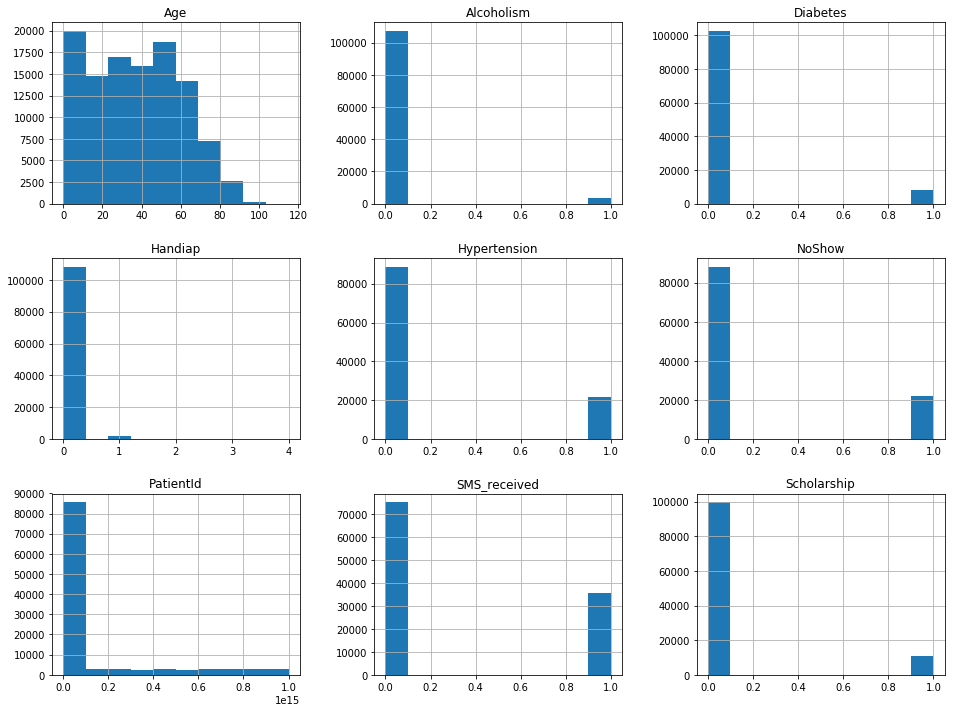

In [21]:
df.hist(figsize=(16,12));


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 : What is the gender  & Age distribution for show / no-show patients?

(explorer the Relationship between: (Gender vs NoShow) and ( (Age vs NoShow)


Check for columns: Gender, NoShow :

found no error records in Gender & NoShow columns:


In [22]:
print(df['Gender'].value_counts())
print("\n")
print(df['NoShow'].value_counts())

F    71839
M    38687
Name: Gender, dtype: int64


0    88207
1    22319
Name: NoShow, dtype: int64


In [23]:
gender_noshow = df.groupby('Gender').sum()['NoShow']

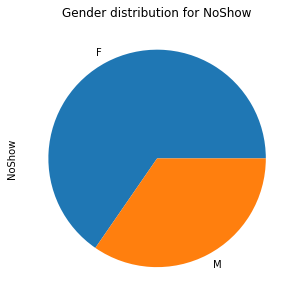

In [24]:
gender_noshow.plot.pie(figsize=(5,5),title = 'Gender distribution for NoShow');


  to see what is the relation for Age vs NoShow:

In [25]:
age_noshow = df.groupby('Age').sum()['NoShow']


In [26]:
age_noshow = age_noshow/ df['Age'].value_counts()
age_noshow.sort_values(ascending=False).head(5)


115    0.600000
14     0.282648
13     0.274705
15     0.265896
9      0.265306
dtype: float64

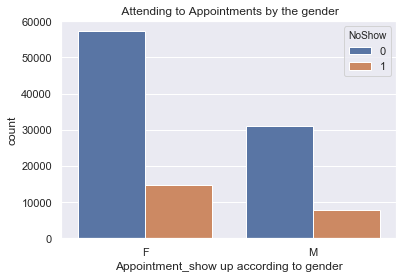

In [27]:
#Does the gender of the patient affect the show up rate?
# No-show between males and females
sns.set(style="darkgrid")
sns.countplot(x='Gender',hue='NoShow',data=df)
plt.xlabel('Appointment_show up according to gender');
plt.title(' Attending to Appointments by the gender');

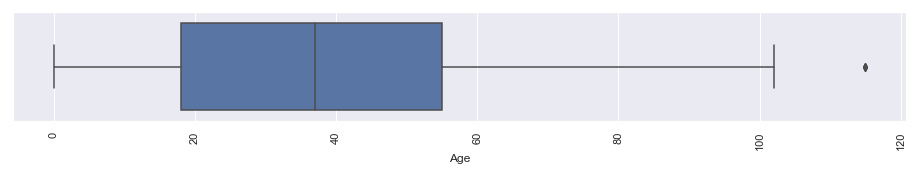

In [28]:
 plt.figure(figsize=(16,2))
 plt.xticks(rotation=90)
 _ = sns.boxplot(x=df.Age)



### Research Question 2  :What is the Neighbourhoods 'hospitals location' that have top of an appointment?¶


find the top of Neighbourhood (hospital) which have a high number of appointment

In [29]:
# what is the proportion of no-shows
N_noshow = df.groupby('Neighbourhood').count()['NoShow']
top_noshow = N_noshow.sort_values(ascending=False).head(7)
top_noshow1 = N_noshow.sort_values(ascending=True).head(7)

In [30]:
# to know the  total number of Neighbourhood which are in our dataset:
len(df['Neighbourhood'].unique())

81

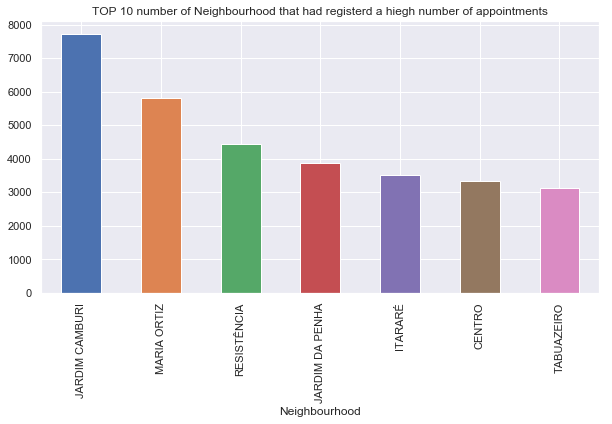

In [31]:
# top 5 of number of Neighbourhood had registerd a hiegh number of appointment regarding by hospital location:
top_noshow.plot(kind='bar',figsize=(10,5),\
                  title = 'TOP 10 number of Neighbourhood that had registerd a hiegh number of appointments');

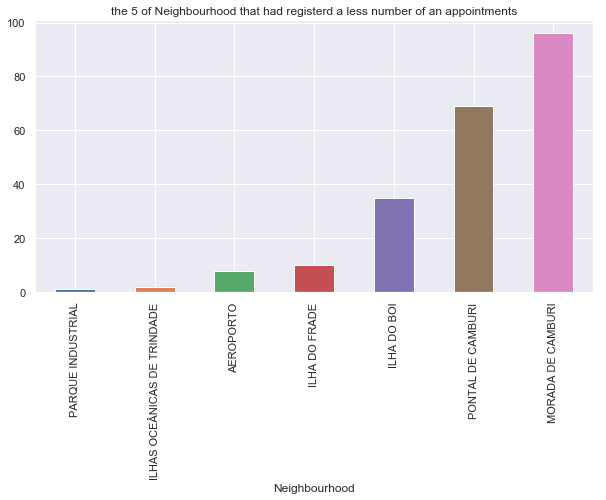

In [32]:
top_noshow1.plot(kind='bar',figsize=(10,5),\
                  title = 'the 5 of Neighbourhood that had registerd a less number of an appointments');

<a id='conclusions'></a>
## Conclusions



I have looked into the dataset and managed a few problems like unifying names, removing wrong data, adding new features based on existing data. I have also investigated most of independent variables in the dataset and made a few observations comparing them to each other as well as to the dependent one (no_show). As this was only an exploratory analysis, many potential correlations may remain uncovered. The data should be investigated further with more advanced statistical analysis to potentially reveal new insights and correlations.
<ul>
<li>The most important findings are:
<li>There are many very young people in the dataset (most of them of age 0) but in general the patients age is distributed evenly and the number of patients goes drastricly down for patients older than 60 years.
<li>The patients are 37 years on average. 25% of patients are below 18 and most of them are below 55.
<li>Most of the patients are not alcoholics.
<li>Most of the patients are not diabetes but more than alcoholics.
<li>There are four handicap categories with most of the people not being handicapted.
<li>Most patients do not have hypertension diagnosed.
<li>On average, 20% of appointments were missed.
<li>Out of 71831 appointments made by females, 14588 were missed with the ratio of 20%.
<li>Out of 38685 appointments made by males, 7723 were missed with the ratio of 20%.
<li>There are patients with multiple appoinpments. The number appointments of top 10 patients range from 88 to 55
<li> For all categorical variables the distributions of show / no-show for different categories look very similar. There is no clear indication of any of these variables having bigger then others impact on show / no-show characteristics. The charts confirm about 20% no-show rate for most categories.
<li> there are 81 Neighbourhood or hospital in the data set and we can see some of top number of Neighbourhood which have a high rate of appointment and  the oppositet .
    
    
    
 <li><h5><emp>Limitations:</h5></emp>
<li>The data set explored in this analysis was over a one year period. Data for a longer timeframe would provide insight into how seasonality and holidays impact show rates.
<li>The results of this research were limited to insights that could be gleaned from the provided data sheet
alone. Documentation regarding background information such as scholarship details and categories of
handicap patients was not provided, which limited the scope of research questions. The research is also
limited to correlation observations in descriptive statistics, and could be more accurately explored with
inferential statistics.
